**Arbitrary Value Imputation**

This technique is derived from kaggle competition

It conssits of replacing a NaN value with an arbitrary value

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# we are taking the extreme values of the distribution for every case there can a different arbitrary value and the values should be more frequently present
def impute_nan(df,variable):
  df[variable+'_hundred'] = df[variable].fillna(100)
  df[variable+'_zero'] = df[variable].fillna(0)

<Axes: >

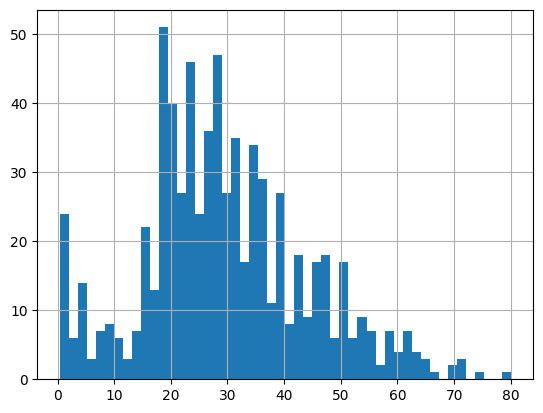

In [ ]:
df['Age'].hist(bins=50)

Advantages

Easy to implement

Captures the importance of missingess if there is one

Disadvantages

Distorts the original distribution of the variable

If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution

Hard to decide which value to use

**Categorical Values**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train_house.csv to train_house (1).csv


In [ ]:
import pandas as pd
df = pd.read_csv('train_house.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


**Frequency Category Imputation**

In [ ]:
df.isnull().mean().sort_values(ascending=True)

,0
SalePrice,0.000000
BsmtQual,0.025342
GarageType,0.055479
FireplaceQu,0.472603


In [ ]:
df.isnull().sum()

,0
BsmtQual,37
FireplaceQu,690
GarageType,81
SalePrice,0


**Compute the Frequency with every feature**

<Axes: xlabel='BsmtQual'>

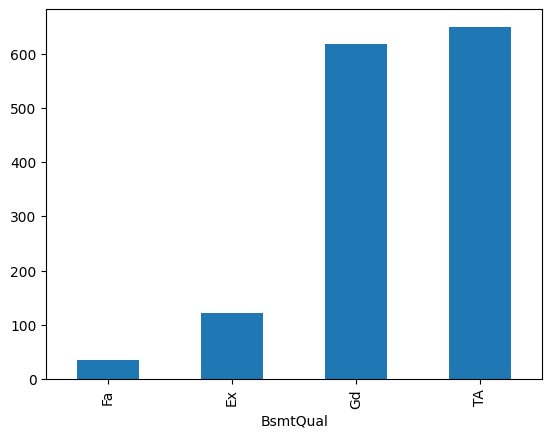

In [ ]:
import matplotlib.pyplot as plt
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=True).plot(kind='bar')

<Axes: xlabel='GarageType'>

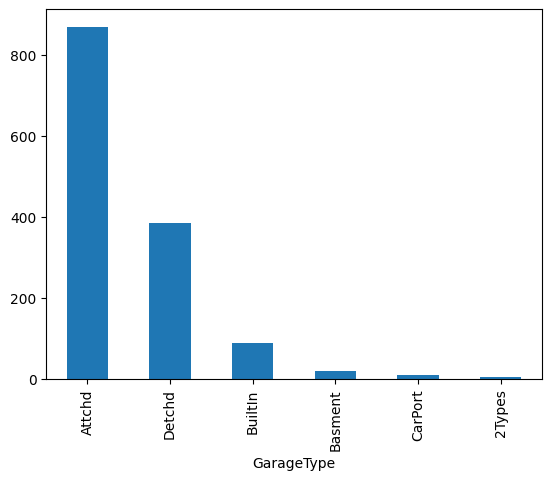

In [ ]:
df['GarageType'].value_counts().plot(kind='bar')

<Axes: xlabel='FireplaceQu'>

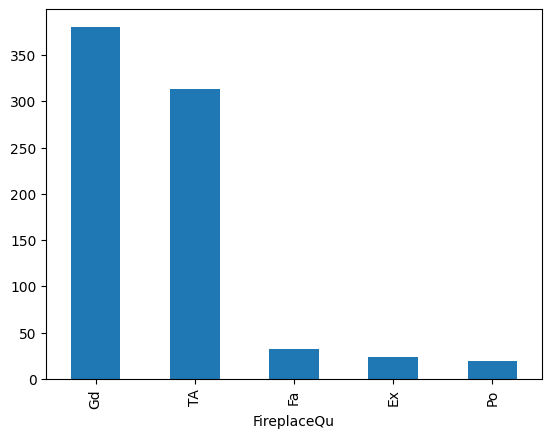

In [ ]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [ ]:
df['FireplaceQu'].value_counts().index[0]

'Gd'

In [ ]:
df.isnull().sum()

,0
BsmtQual,37
FireplaceQu,690
GarageType,81
SalePrice,0


In [ ]:
def impute_nan(df,variable):
  most_frequent_categories = df[variable].value_counts().index[0]    # instead of value_counts use mode() an alternate
  df[variable].fillna(most_frequent_categories,inplace=True)

In [ ]:
df['FireplaceQu'].mode()[0]

'Gd'

In [ ]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
  impute_nan(df,feature)


/tmp/ipython-input-3415949841.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[variable].fillna(most_frequent_categories,inplace=True)
/tmp/ipython-input-3415949841.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [ ]:
df.isnull().mean()

,0
BsmtQual,0.0
FireplaceQu,0.0
GarageType,0.0
SalePrice,0.0


In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


**Advantages**

1.Easy To implement

2.Fater way to implement

**Disadvantages**

1.Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's

2.It distorts the relation of the most frequent label

**Adding a variable to capture NAN**

In [ ]:
df=pd.read_csv('train_house.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
import numpy as np
df['BsmtQual_var'] = np.where(df['BsmtQual'].isnull(),1,0)  # here we are capturing the missing value and even handling the missing value but disavantage is we are increasing the features
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [ ]:
frequent = df['BsmtQual'].mode()[0]

In [ ]:
df['BsmtQual'].fillna(frequent,inplace=True)

/tmp/ipython-input-3298261182.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BsmtQual'].fillna(frequent,inplace=True)


In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [ ]:
df.isnull().mean()

,0
BsmtQual,0.000000
FireplaceQu,0.472603
GarageType,0.055479
SalePrice,0.000000
BsmtQual_var,0.000000


In [ ]:
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

/tmp/ipython-input-123192123.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FireplaceQu'].fillna(frequent,inplace=True)


In [ ]:
df.isnull().mean()

,0
BsmtQual,0.000000
FireplaceQu,0.000000
GarageType,0.055479
SalePrice,0.000000
BsmtQual_var,0.000000
FireplaceQu_Var,0.000000


**Suppose if you have more frequent categories, we just replace NAN with a new category**

In [ ]:
df=pd.read_csv('train_house.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
import numpy as np
def impute_nan(df,variable):
  df[variable+'newvar'] = np.where(df[variable].isnull(),"Missing",df[variable])

In [ ]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
  impute_nan(df,feature)

In [ ]:
df.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


here either we can drop the existing features or replace the existing features with the new inplace both works

In [ ]:
df = df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1, errors='ignore')
df

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
...,...,...,...,...
1455,175000,Gd,TA,Attchd
1456,210000,Gd,TA,Attchd
1457,266500,TA,Gd,Attchd
1458,142125,TA,Missing,Attchd
